In [ ]:
#importing the dependencies:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
import os
from dotenv import load_dotenv



In [ ]:
load_dotenv()
hf_api_key = os.getenv("hf_api_token")


In [ ]:
#importing the model:


llm_model = HuggingFaceEndpoint(
    repo_id="google/gemma-3-27b-it",
    task="text-generation",
    huggingfacehub_api_token=hf_api_key,
    temperature=0.5
)

model = ChatHuggingFace(llm=llm_model)

# result=model.invoke("what is your name")
# print(result.content)

In [27]:
#creating the state:
class llmstate(TypedDict) :
    question: str
    answer:str

In [28]:
def llm_qa(state:llmstate) ->llmstate:
    #extract the qustion from state:
    question=state['question']

    #form a prompt:
    prompt=f"answer the following questions{question}"

    #ask that question to llm:
    response=model.invoke(prompt)
    answer=response.content

    #update the ans in the state:
    state['answer']=answer

    return state


In [29]:
#creating our graph
graph=StateGraph(llmstate)

#creating our nodes:
graph.add_node('llmQA',llm_qa)


#creating our edges:
graph.add_edge(START,'llmQA')
graph.add_edge('llmQA',END)

#compiling:
workflow=graph.compile()

In [30]:
#execute:
inital_state={'question':'how far is sun from earth?'}
final_state=workflow.invoke(inital_state)
print(final_state['answer'])


The distance between the Sun and Earth isn't constant! It varies as Earth orbits the Sun in an ellipse, not a perfect circle. Here's a breakdown:

* **Average distance (Astronomical Unit - AU):** About **93 million miles (150 million kilometers)**. This is often used as a standard unit of measurement in astronomy.
* **Closest distance (Perihelion):** Around **91.4 million miles (147.1 million kilometers)** - happens in early January.
* **Farthest distance (Aphelion):** Around **94.5 million miles (152.1 million kilometers)** - happens in early July.



So, while you'll often hear 93 million miles, it's important to remember it's an *average*.

You can even check the *current* distance here: [https://www.timeanddate.com/astronomy/distance-sun.html](https://www.timeanddate.com/astronomy/distance-sun.html)






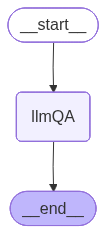

In [23]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())